<a href="https://colab.research.google.com/github/LaBruma/PosgradoAI/blob/master/TP_Integrador_An%C3%A1lisis_de_datos_Brumovsky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


In [ ]:
#================================= 
# 1. ANÁLISIS EXPLORATORIO INICIAL
#=================================

# Cargamos las librerías necesarias
#----------------------------------
%load_ext autoreload
%autoreload 2

# Importamos librerías 
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats

In [ ]:
# Montamos el drive
#------------------
from google.colab import drive
drive.mount('/content/drive')

# Cargamos el dataset (previamente subido al drive)
#--------------------------------------------------
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/weatherAUS.csv')

Mounted at /content/drive


In [ ]:
# Mostramos las primeras 5 filas
#-------------------------------
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Con este primer atisbo a los datos ya se puede ver:

*   Los nombres y cantidad de columnas del dataset
*   El tipo de dato base (numérico/categórico)
*   La presencia de datos faltantes (NaNs) para algunas columnas
*   Los rangos aproximados para las variables numéricas

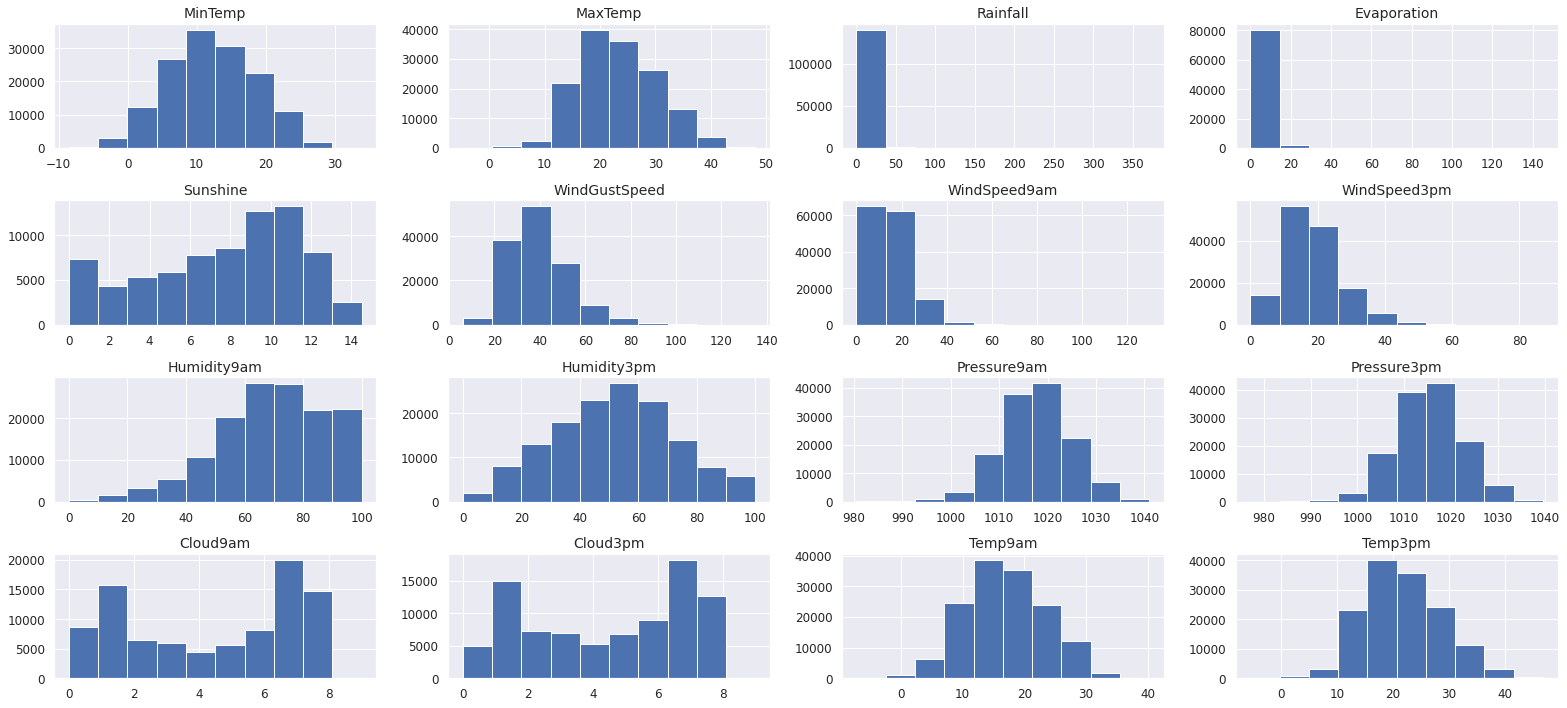

In [ ]:
# Miramos un poco la distribución de datos
#-----------------------------------------
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

display_dataset_distributions(dataset)

Ya esta visualización da un mayor "insight" de los datos.

*   Podemos ver de manera más precisa el rango para cada variable numérica
*   Cual es su distribución de probabilidad (si se parece a una normal o no, si está balanceada (oblicuidad), la concentración de muestras (curtosis), etc.

In [ ]:
# Luego tenemos dos funciones de Pandas que nos permiten tener más información del dataset
#-----------------------------------------------------------------------------------------
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


La primer salida (**info**) está buena porque nos marca los nombres de las columnas, el tipo de dato detallado si es numérico y "object" si es categórico y la cantidad de datos no nulos por variable (como para tener una idea de los NaNs en cada variable...y en todo caso saber empezar a ver si podría ser factible pensar en eliminar toda la columna)

La segunda salida (**describe**) aporta sobre las variables de tipo numérico algunos estimadores estadísticos más (media, desvío, mínimo, máximo y cuartiles)

In [ ]:
# Nos fijamos la cardinalidad de las variables categóricas
#---------------------------------------------------------
print('Cantidad de datos únicos en el dataset para la variable categórica Date: {}'.format(np.unique(dataset.Date).shape))
print('Cantidad de datos únicos en el dataset para la variable categórica Location: {}'.format(np.unique(dataset.Location).shape))
#print('Cantidad de datos únicos en el dataset para la variable categórica WindGustDir: {}'.format(np.unique(dataset.WindGustDir).shape))
#print('Cantidad de datos únicos en el dataset para la variable categórica WindDir9am: {}'.format(np.unique(dataset.WindDir9am).shape))
#print('Cantidad de datos únicos en el dataset para la variable categórica WindDir3pm: {}'.format(np.unique(dataset.WindDir3pm).shape))
#print('Cantidad de datos únicos en el dataset para la variable categórica RainToday: {}'.format(np.unique(dataset.RainToday).shape))
#print('Cantidad de datos únicos en el dataset para la variable categórica RainTomorrow: {}'.format(np.unique(dataset.RainTomorrow).shape))

Cantidad de datos únicos en el dataset para la variable categórica Date: (3436,)
Cantidad de datos únicos en el dataset para la variable categórica Location: (49,)


**Primeras conclusiones**

Se identificaron los tipos de datos de varias maneras distintas (head,info,describe). 

En relación a las ***variables del problema*** podemos decir:

 * Date - *categórica* - fecha de toma del dato (facilmente convertible a numérica según día del año)
 * Location - *categórica*  - ubicación de toma del dato
 * MinTemp - *numérica* - Temperatura mínima registrada ese día
 * MaxTemp - *numérica* - Temperatura máxima registrada ese día
 * Rainfall - *numérica* - Milímetros de lluvia registrados ese día
 * Evaporation - *numérica* - Evaporación de agua ese día en mm
 * Sunshine - *numérica* - Número de horas de sol en el día
 * WindGustDir - *categórica* - Dirección de la máxima ráfaga de viento en el día
 * WindGustSpeed - *numérica* - Velocidad de la ráfaga para la variable anterior
 * WindDir9am - *categórica* - Dirección del viento a las 9am
 * WindDir3pm - *categórica* - Dirección del viento a las 3pm
 * WindSpeed9am - *numérica* - Velocidad del viento a las 9am
 * WindSpeed3pm - *numérica* - Velocidad del viento a las 3pm
 * Humidity9am - *numérica* - Humedad relativa a las 9am
 * Humidity3pm - *numérica* - Humedad relativa a las 3pm
 * Pressure9am - *numérica* - Presión atmosférica a las 9am
 * Pressure3pm - *numérica* - Presión atmosférica a las 3pm
 * Cloud9am - *numérica* - Nubosidad a las 9am
 * Cloud3pm - *numérica* - Nubosidad a las 3pm
 * Temp9am - *numérica* - Temperatura a las 9am
 * Temp3pm - *numérica* - Temperatura a las 3pm
 * RainToday - *categórica* - Llovió el día del registro?
 * RainTomorrow - *categórica* - Llovió el día siguiente al registro?

La ***variable de salida*** es RainTomorrow, la cual es una versión desplazada de RainToday en el dataset (solo para mencionar que podrían no haberme dato ese dato...)

Las ***variables de entrada***, a priori, son todas las demás. Luego veremos si hay alguna que no aporte información o esté correlacionada con otra como para no incluirla.

**Variables de entrada numéricas**

* MinTemp tiene una distribución aproximada gausiana
* MaxTemp tiene una distribución simil gausiana pero con oblicuidad a la derecha (hay más días de calor extremo que de frío extremo)
* Rainfall y Evaporation tienen distribuciones plenamente concentradas (cuando llueve, llueve poco, practicamente siempre)
* Sunshine es cuasi uniforme entre 2 y 12 horas
* WindGustSpeed se parece a una Chi2 (oblicua hacia la izquierda). Más ráfagas de menor velocidad.
* WindSpeed9am y WindSpeed3pm también son oblicuas a izquierda, con la salvedad que 3pm está corrida de 9am hacia la derecha (más velocidad del viento por la tarde)
* Humidity9am es oblicua a derecha (hay humedades más altas que bajas normalmente)
* Humidity3pm es simil gaussiana. Se estabiliza la humedad alrededor de 50%, con variación simétrica, sin importar si el día inició muy húmedo o no.
* Pressure9am y Pressure3pm son simil gaussiana centradas alrededor de 1020HPa aproximadamente.
* Cloud9am y Cloud3pm son aproximadamente uniformes entre 0 y 8 oktas
* Temp9am y Temp3pm tienen distribuciones similares con oblicuidad a derecha (mayor presencia de temperaturas altas que bajas para esas horas)

**Variables de entrada categóricas**

* Date tiene una cardinalidad alta (3436), lo cual tiene sentido porque el dataset dice que son 10 años y cada año tiene 365 días (sin diferenciar bisiestos). Resta ver si hay días que no se registraron o si son menos de 10 años. Otra cosa que se puede hacer es pasar esta variable a numérica codificando por día del año, en ese caso habrá (como máximo) 10 filas que compartan mismo día del año, pero perder esta información podría no estar mal si se quiere pronosticar por estacionalidad.
* Location tiene una cardinalidad de 49. Es alta también. Habrá que ver si hay regiones que tienen pocos registros en comparación a otros y se pueden descartar.
* No podemos decir nada aún de WindGustDir, WindDir9am, WindDir3pm ya que como contienen valores con NaNs nos da error la función de numpy unique, que considera a los NaNs como tipo de dato float64 mientras que las categorías son strings. Cuando limpiemos de NaNs lo miramos.
* RainToday también da error (porque también tiene NaNs) pero ya sabemos que tiene dos posibles valores (YES/NO).

**¿Qué técnicas consideraría para codificar la variable de salida? Justificar.**

Yo simplemente la convertiría a una variable de tipo booleana:

* 1: Llueve mañana
* 0: No llueve mañana